#Introduction

Everyone know techies love their avocado toast, but is that love reflected in sales data? This is an analysis of avocado sales data in the United States from January 2015 through November 2020. The Data was collected by the Haas Avocado Board, and compiled on [Kaggle](https://www.kaggle.com/timmate/avocado-prices-2020). I will be using statistical testing to analyze the effects of region on price and percent change in volume, while also looking into the differences between avocado types. 

#Import Libraries and Load Dataset

In [58]:
#import libraries
from datetime import datetime
import numpy as np
import pandas as pd 
from scipy import stats
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from matplotlib.pyplot import figure

Mount Google Drive 

In [59]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Load avocado data csv

In [60]:
df= pd.read_csv('/content/gdrive/My Drive/Colab Datasets/avocado_2020.csv')

#Exploring the Data

In [61]:
df.shape

(33045, 13)

In [62]:
df.head()

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,2015,Albany
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,2015,Atlanta
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,2015,Baltimore/Washington


Check for null values

In [63]:
df.isnull().sum()

date             0
average_price    0
total_volume     0
4046             0
4225             0
4770             0
total_bags       0
small_bags       0
large_bags       0
xlarge_bags      0
type             0
year             0
geography        0
dtype: int64

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33045 entries, 0 to 33044
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           33045 non-null  object 
 1   average_price  33045 non-null  float64
 2   total_volume   33045 non-null  float64
 3   4046           33045 non-null  float64
 4   4225           33045 non-null  float64
 5   4770           33045 non-null  float64
 6   total_bags     33045 non-null  float64
 7   small_bags     33045 non-null  float64
 8   large_bags     33045 non-null  float64
 9   xlarge_bags    33045 non-null  float64
 10  type           33045 non-null  object 
 11  year           33045 non-null  int64  
 12  geography      33045 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 3.3+ MB


Change date from object to datetime

In [65]:
df['date']=df['date'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d'))

#Distributions of Column Data

In [66]:
print(df['date'].min())
print(df['date'].max())

2015-01-04 00:00:00
2020-11-29 00:00:00


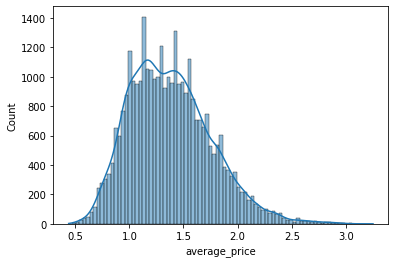

In [67]:
sns.histplot(df['average_price'],kde='true')

Average price looks to be approximatly normal

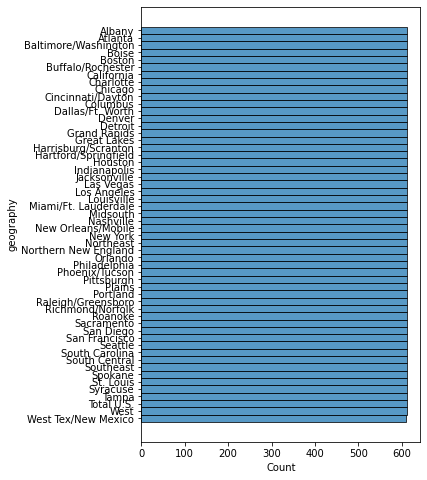

In [68]:
figure(figsize=(5,8))
sns.histplot(y='geography',data=df)

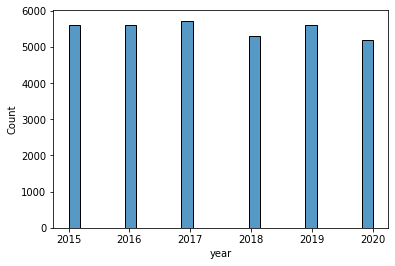

In [69]:
sns.histplot(df['year'])

Now lets look into the two avocado types

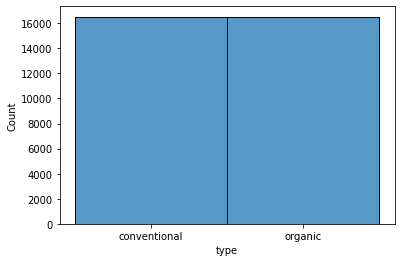

In [70]:
sns.histplot(df['type'])

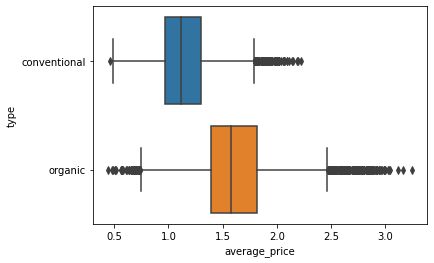

In [71]:
sns.boxplot(x='average_price',y='type',data=df)

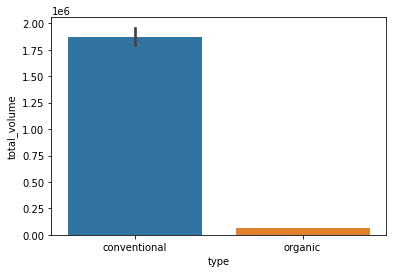

In [72]:
sns.barplot(x='type',y='total_volume',data=df)

#Create New Dataframes to Aggregate Data

Create lists for tech and non tech cities as defined by builtin.com/tech-hubs



In [73]:
tech_list=['Atlanta','Baltimore/Washington','Boston','Chicago','Dallas/Ft. Worth','Denver','Los Angeles','San Diego','San Francisco','Seattle']

In [74]:
ntech_list=['Albany','Boise','Buffalo/Rochester','Charlotte','Cincinnati/Dayton','Columbus','Detroit','Grand Rapids','Harrisburg/Scranton','Hartford/Springfield','Houston','Indianapolis','Jacksonville','Las Vegas','Louisville','Miami/Ft. Lauderdale','Nashville','New Orleans/Mobile','Orlando','Philadelphia','Phoenix/Tucson','Pittsburgh','Portland','Raleigh/Greensboro','Richmond/Norfolk','Roanoke','Sacramento','Spokane','St. Louis','Syracuse','Tampa']

Create tech data frame for sales in a tech hub as listed by builtin.com/tech-hubs and a non tech data frame for sales in non tech hub cities

In [75]:
tech_df=df[df['geography'].isin(tech_list)]

In [76]:
ntech=df[df['geography'].isin(ntech_list)]

Now split each dataframe by type


In [77]:
con_tech=tech_df[tech_df['type']=='conventional']

In [78]:
org_tech=tech_df[tech_df['type']=='organic']

In [79]:
con_ntech=ntech[ntech['type']=='conventional']

In [80]:
org_ntech=ntech[ntech['type']=='organic']

Lets take a quick look at our new distributions

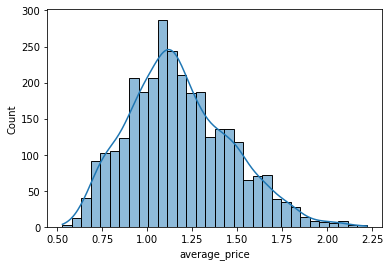

In [81]:
sns.histplot(con_tech['average_price'],kde=True)

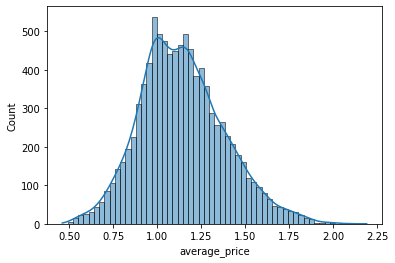

In [82]:
sns.histplot(con_ntech['average_price'],kde=True)

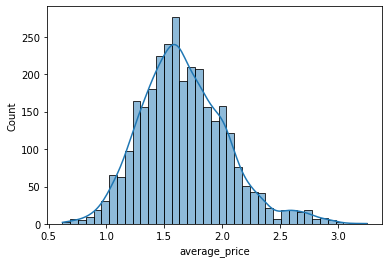

In [83]:
sns.histplot(org_tech['average_price'],kde=True)

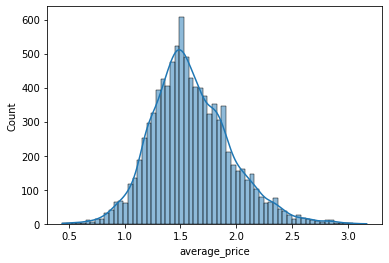

In [84]:
sns.histplot(org_ntech['average_price'],kde=True)

All distributions are approximately normal, allowing us to use Welch's T-Test

#Is There a Significant Difference in Average Price Between Tech and Non-Tech Cities?

$H_0$ : There is no significant difference in conventional avocado average price between tech and non-tech cities.

$H_a$ : There is a significant difference in conventional avocado average price between tech and non-tech cities.

In [85]:
stats.ttest_ind(con_tech['average_price'],con_ntech['average_price'],equal_var=False)

Ttest_indResult(statistic=6.784666986505149, pvalue=1.3115344860690435e-11)

We reject the null hypothesis that there is no significant difference in conventional avocado average price between tech and non-tech cities. This difference is significant as the p value is well below 0.05



---



$H_0$ : There is no significant difference in organic avocado average price between tech and non-tech cities.

$H_a$ : There is a significant difference in organic avocado average price between tech and non-tech cities.

In [86]:
stats.ttest_ind(org_tech['average_price'],org_ntech['average_price'],equal_var=False)

Ttest_indResult(statistic=9.54068291568152, pvalue=2.1642675204654786e-21)

We reject the null hypothesis that there is no significant difference in organic avocado average price between tech and non-tech cities. This difference is significant as the p value is well below 0.05

We can see that tech cities pay more for both types of avocados, but the difference in price is larger for organic avocados 

#Is There a Significant Difference in Percent Change of Volume Between Avocado Types in Tech Cities?

To calculate percent change we need to create a new dataframe from each avocado type and sum total volume by date. After that we can calculate the percent change in volume and compare.

In [87]:
#Conventional Avocados
temp_ct= con_tech[['date','total_volume']]
grouped_ct=temp_ct.groupby(['date']).sum()

In [88]:
#Organic Avocados 
temp_ot= org_tech[['date','total_volume']]
grouped_ot=temp_ot.groupby(['date']).sum()

Create a scatterplot with the newly grouped data to look for any trends

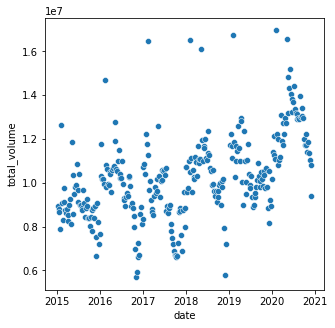

In [89]:
figure(figsize=(5,5))
sns.scatterplot(x='date',y='total_volume',data=grouped_ct)

We see a possible trend of increasing volume for conventional avocados, what about organic?

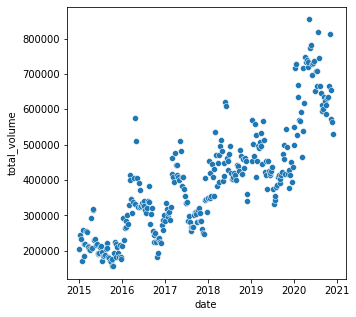

In [90]:
figure(figsize=(5,5))
sns.scatterplot(x='date',y='total_volume',data=grouped_ot)

To the naked eye it looks like organic avocados have a stronger trend of increasing volume.

Now calculate the percent change by week

In [91]:
#Starting with conventional
pct_ct=grouped_ct.pct_change()

In [92]:
#Now with organic
pct_ot=grouped_ot.pct_change()

In [93]:
pct_ct.head(5)

,total_volume
date,
2015-01-04,NaN
2015-01-11,-0.014827
2015-01-18,-0.015754
2015-01-25,-0.091831
2015-02-01,0.608187


Looking at our result we need to cleanup our resulting dataframe

Change total_volume column to percent change

In [94]:
pct_ct.rename(columns={'total_volume':'percent_change'},inplace=True)
pct_ot.rename(columns={'total_volume':'percent_change'},inplace=True)

Taking percent change creates a null value for the first entry so we will drop that value

In [95]:
pct_ct=pct_ct.dropna()
pct_ot=pct_ot.dropna()

Multiply by 100 to convert from decimal to percent

In [96]:
pct_ct['percent_change']=100*pct_ct['percent_change']
pct_ot['percent_change']=100*pct_ot['percent_change']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [97]:
pct_ct.describe()

,percent_change
count,305.000000
mean,0.884810
std,13.936903
min,-32.575081
25%,-6.334737
50%,-1.213810
75%,5.197450
max,62.425063


In [98]:
pct_ot.describe()

,percent_change
count,305.000000
mean,1.300509
std,14.686518
min,-28.605321
25%,-7.411246
50%,-0.101650
75%,7.809972
max,72.802202


We can see that organic had a higher average percent change than organic, but was this difference significant? Use Welch's T-Test to check. 

$H_0$ : There is no significant difference in average percent change of total volume between avocado types in tech cities

$H_a$ : There is a significant difference in average percent change of total volume between avocado types in tech cities

In [99]:
stats.ttest_ind(pct_ot['percent_change'],pct_ct['percent_change'],equal_var=False)

Ttest_indResult(statistic=0.3585697886101425, pvalue=0.7200417609618657)

We fail to reject the null hypothesis that there is no significant difference in average percent change of total volume between avocado types in tech cities.

#Is There a Significant Difference in Percent Change of Volume Between Avocado Types in Non-Tech Cities?

Repeat steps for non-tech

In [100]:
#Conventional Avocados
temp_cn= con_ntech[['date','total_volume']]
grouped_cn=temp_cn.groupby(['date']).sum()

In [101]:
#Organic Avocados 
temp_on= org_ntech[['date','total_volume']]
grouped_on=temp_on.groupby(['date']).sum()

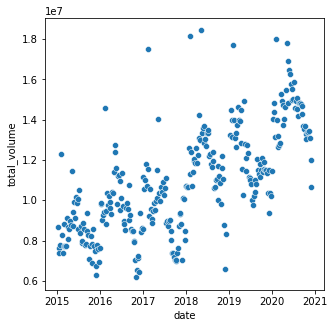

In [102]:
figure(figsize=(5,5))
sns.scatterplot(x='date',y='total_volume',data=grouped_cn)

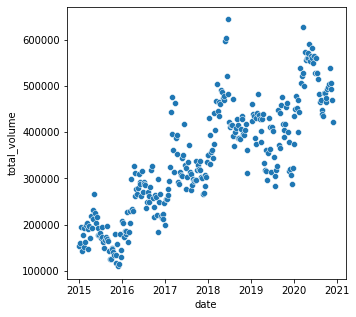

In [103]:
figure(figsize=(5,5))
sns.scatterplot(x='date',y='total_volume',data=grouped_on)

In [104]:
pct_cn=grouped_cn.pct_change()

In [105]:
pct_on=grouped_on.pct_change()

In [106]:
pct_cn.rename(columns={'total_volume':'percent_change'},inplace=True)
pct_on.rename(columns={'total_volume':'percent_change'},inplace=True)

In [107]:
pct_cn=pct_cn.dropna()
pct_on=pct_on.dropna()

In [108]:
pct_cn['percent_change']=100*pct_cn['percent_change']
pct_on['percent_change']=100*pct_on['percent_change']

In [109]:
pct_cn.describe()

,percent_change
count,305.000000
mean,0.973075
std,14.163269
min,-35.200208
25%,-5.877152
50%,-0.537291
75%,4.841493
max,63.651224


In [110]:
pct_on.describe()

,percent_change
count,305.000000
mean,1.280012
std,14.153219
min,-30.230371
25%,-6.264462
50%,0.000000
75%,8.484309
max,62.836801


We again see that organic had a higher average percent change than organic, but was this difference significant? Use Welch's T-Test to check.

$H_0$ : There is no significant difference in average percent change of total volume between avocado types in non-tech cities

$H_a$ : There is a significant difference in average percent change of total volume between avocado types in non-tech cities

In [111]:
stats.ttest_ind(pct_on['percent_change'],pct_cn['percent_change'],equal_var=False)

Ttest_indResult(statistic=0.26771668704922175, pvalue=0.7890081979492876)

We fail to reject the null hypothesis that there is no significant difference in average percent change of total volume between avocado types in non tech cities.

#Additional Findings From Percent Change Analysis

What is the total percent change in volume for each group?

In [112]:
sum_ct=pct_ct['percent_change'].sum()
sum_ot=pct_ot['percent_change'].sum()
sum_cn=pct_cn['percent_change'].sum()
sum_on=pct_on['percent_change'].sum()
print('Percent change in volume for conventional avocados in tech cities:'+str(sum_ct))
print('Percent change in volume for organic avocados in tech cities:'+str(sum_ot))
print('Percent change in volume for conventional avocados in non-tech cities:'+str(sum_cn))
print('Percent change in volume for organic avocados in tech non-tech cities:'+str(sum_on))

Percent change in volume for conventional avocados in tech cities:269.8670108470674
Percent change in volume for organic avocados in tech cities:396.6552694451149
Percent change in volume for conventional avocados in non-tech cities:296.7878288551499
Percent change in volume for organic avocados in tech non-tech cities:390.40376572276773


Growth rate for volume is very similar between tech and non tech areas, while organic volume has grown faster than conventional 

#Reccomendations

The primary use case for this analysis would be for businesses selling avocados and euntreprenuers looking to open avocado related businesses. 

1.   There is a significant difference in average price between tech and non-tech cities, so businesses looking to sell avocado products should open in tech cities as consumers are willing to pay more.
2.   Although there was no significant difference in percent change of volume between organic and conventional avocados, volume growth is consistent showing opportunity for market entry across the U.S
3.   Given higher total volume in conventional avocado sales, new businesses should focus on conventional avocado sales in tech cities

